In [1]:
# Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read in the files
consolidated_file=pd.read_csv('Resources/consolidated_coin_data.csv')
crypto_markets=pd.read_csv('Resources/crypto-markets.csv')
income_data=pd.read_csv('Resources/cleaned_disposable_inc.csv')

In [3]:
# Convert to DataFrame
consolidated_df=pd.DataFrame(consolidated_file)
crypto_df=pd.DataFrame(crypto_markets)
income_df=pd.DataFrame(income_data)

In [4]:
# Drop out some columns from crypto_df
crypto_df=crypto_df[['name','date','open','high','low','close','volume','market','spread']]

In [5]:
# Convert the data from last 6 columns
column_list=['Open','High','Low','Close','Volume','Market Cap']
for x in column_list:
    consolidated_df[x] = consolidated_df[x].str.replace(',', '').astype(float)

In [6]:
# Rename columns for consolidated_df
consolidated_df=consolidated_df.rename(columns={'Currency':'Name','Market Cap':'Market_Cap'})

In [7]:
# Rename the columns from the crypto_df
crypto_df=crypto_df.rename(columns={'name':'Name',\
                                    'open':'Open',\
                                    'high':'High',\
                                    'date':'Date',\
                                    'low':'Low',\
                                    'close':'Close',\
                                    'volume':'Volume',\
                                    'market':'Market_Cap',\
                                    'spread':'Spread'})

In [8]:
# Double check the type for the DataFrame
consolidated_df.dtypes

Name           object
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market_Cap    float64
dtype: object

In [9]:
# Display the newly updated DataFrame
consolidated_df

,Name,Date,Open,High,Low,Close,Volume,Market_Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509.0
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342.0
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179.0
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390.0
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680.0
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979.0
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596.0
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0.0,74020918.0
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0.0,75388964.0


In [10]:
# Display the crypto_df
crypto_df

,Name,Date,Open,High,Low,Close,Volume,Market_Cap,Spread
0,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,3.88
1,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,13.49
2,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,12.88
3,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,32.17
4,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,33.32
...,...,...,...,...,...,...,...,...,...
942292,Project-X,2018-11-26,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,5441.80
942293,Project-X,2018-11-27,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,4449.20
942294,Project-X,2018-11-28,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,5347.00
942295,Project-X,2018-11-29,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,3124.52


In [11]:
# Set the index to Currency column 
consolidated_df=consolidated_df.set_index('Name')

In [12]:
# Filter out for just bitcoin
btc_df=consolidated_df.loc['bitcoin']

In [13]:
# Display the btc_df
btc_df

,Date,Open,High,Low,Close,Volume,Market_Cap
Name,,,,,,,
bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11
bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11
bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11
bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11
bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11
...,...,...,...,...,...,...,...
bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09
bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09
bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09


In [14]:
# Convert the date to Mm-yyyy format
btc_df['Month_Year']=pd.to_datetime(btc_df['Date']).dt.to_period('M')

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Display the cleaned btc_df
btc_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year
Name,,,,,,,,
bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11,2019-12
bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11,2019-12
bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11,2019-12
bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11,2019-12
bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11,2019-11
...,...,...,...,...,...,...,...,...
bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,2013-05
bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,2013-05
bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,2013-04


In [16]:
# Lower the values in the name column
crypto_df['Name']=crypto_df['Name'].str.lower()

In [17]:
# Convert date to MM-yyyy
crypto_df['Month_Year']=pd.to_datetime(crypto_df['Date']).dt.to_period('M')

In [18]:
# Display the crypto_df
crypto_df

,Name,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year
0,bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,3.88,2013-04
1,bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,13.49,2013-04
2,bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,12.88,2013-04
3,bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,32.17,2013-05
4,bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,33.32,2013-05
...,...,...,...,...,...,...,...,...,...,...
942292,project-x,2018-11-26,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,5441.80,2018-11
942293,project-x,2018-11-27,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,4449.20,2018-11
942294,project-x,2018-11-28,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,5347.00,2018-11
942295,project-x,2018-11-29,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,3124.52,2018-11


In [19]:
# Set the index to name
crypto_df=crypto_df.set_index('Name')

In [20]:
# Filter out the bitcoin
btc_spread_df=crypto_df.loc['bitcoin']

In [21]:
# Display the btc1_df
btc_spread_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year
Name,,,,,,,,,
bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,3.88,2013-04
bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,13.49,2013-04
bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,12.88,2013-04
bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,32.17,2013-05
bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,33.32,2013-05
...,...,...,...,...,...,...,...,...,...
bitcoin,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,535.81,2018-11
bitcoin,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,463.22,2018-11
bitcoin,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,201.95,2018-11


In [22]:
# Join two dataframe
final_df=pd.concat([btc_df,btc_spread_df])

In [23]:
# Append and filter out the spread with matched date
new_df=final_df[~pd.isnull(final_df['Spread'])]

In [24]:
# Display the newly created df
new_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year,Spread
Name,,,,,,,,,
bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,2013-04,3.88
bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,2013-04,13.49
bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,2013-04,12.88
bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,2013-05,32.17
bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,2013-05,33.32
...,...,...,...,...,...,...,...,...,...
bitcoin,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,2018-11,535.81
bitcoin,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,2018-11,463.22
bitcoin,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,2018-11,201.95


In [25]:
# Export out the new_df to csv file
new_df.to_csv('Resources/cleaned_crypto.csv')

In [26]:
# Add the Y_Average for the new_df
new_df['BTC_Average']=(new_df['Open']+new_df['High']+new_df['Low']+new_df['Close'])/4

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Convert the Month_Year to period[M] type for income_df
income_df['Month_Year']=income_df['Month_Year'].astype('period[M]')

In [28]:
# Join the new_df with the income_df
income_btc_df=income_df.merge(new_df,on='Date')

In [29]:
# Display the incom_btc_df
income_btc_df.head(10)

,Unnamed: 0,Date,Income,Month,Month_Year_x,Open,High,Low,Close,Volume,Market_Cap,Month_Year_y,Spread,BTC_Average
0,652,2013-05-01,39054.0,5,2013-05,139.00,139.89,107.72,116.99,0.0,1.298955e+09,2013-05,32.17,125.9000
1,653,2013-06-01,39071.0,6,2013-06,128.82,129.78,127.20,129.30,0.0,1.451916e+09,2013-06,2.58,128.7750
2,654,2013-07-01,39004.0,7,2013-07,97.51,97.66,86.30,88.05,0.0,1.000065e+09,2013-07,11.36,92.3800
3,655,2013-08-01,39063.0,8,2013-08,106.21,108.00,103.01,104.00,0.0,1.195225e+09,2013-08,4.99,105.3050
4,656,2013-09-01,39194.0,9,2013-09,135.14,145.81,134.81,138.34,0.0,1.610215e+09,2013-09,11.00,138.5250
5,657,2013-10-01,39064.0,10,2013-10,132.68,134.63,131.55,132.18,0.0,1.557001e+09,2013-10,3.08,132.7600
6,658,2013-11-01,39165.0,11,2013-11,203.90,206.65,202.13,206.18,0.0,2.460743e+09,2013-11,4.52,204.7150
7,659,2013-12-01,39265.0,12,2013-12,1128.92,1133.08,801.82,955.85,0.0,1.153171e+10,2013-12,331.26,1004.9175
8,660,2014-01-01,39432.0,1,2014-01,754.97,775.35,754.97,771.40,22489400.0,9.403308e+09,2014-01,20.38,764.1725
9,661,2014-02-01,39655.0,2,2014-02,828.61,853.52,827.11,832.58,19668700.0,1.027520e+10,2014-02,26.41,835.4550


In [30]:
# income_btc_df['Y_Average'].unique()

In [31]:
# y_new1

In [32]:
# Drop some columns
income_btc_df=income_btc_df[['Date','Income','Open','High','Low','Close','Volume','Market_Cap','Spread','BTC_Average']]

In [33]:
# Select the X and y for the machine
X=income_btc_df.drop(['Date','High','Open','Close','Low','BTC_Average'],axis=1)
y=income_btc_df['BTC_Average'].values.reshape(-1, 1)

In [34]:
print(X.shape,y.shape)

(67, 4) (67, 1)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [37]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [38]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [39]:
# Create a Linear Regression model
model = LinearRegression()

In [40]:
# Fit in the model
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [41]:
print(model)

LinearRegression()


In [42]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-0.00553592  0.06788141  0.90844071  0.00943712]]
y-axis intercept:  [0.00691859]


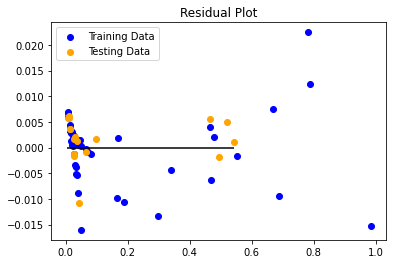

In [43]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [44]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

First 10 Predictions:   [[0.02819719]
 [0.0265983 ]
 [0.00922351]
 [0.04352103]
 [0.06403069]
 [0.03647522]
 [0.54402089]
 [0.00908427]
 [0.51993738]
 [0.02522397]]
First 10 Actual stats: [[0.02618135]
 [0.02817744]
 [0.00337646]
 [0.05437123]
 [0.06494419]
 [0.03523987]
 [0.54301168]
 [0.00295463]
 [0.51491747]
 [0.02641659]]


In [45]:
y_new = y_scaler.inverse_transform(y_test_scaled)


In [46]:
y_new1 = y_scaler.inverse_transform(predictions)


In [47]:
# Actual values
y_new

array([[ 450.1925],
       [ 477.4725],
       [ 138.525 ],
       [ 835.455 ],
       [ 979.9525],
       [ 573.9925],
       [7513.555 ],
       [ 132.76  ],
       [7129.6   ],
       [ 453.4075],
       [ 226.5425],
       [6858.7775],
       [ 229.115 ],
       [ 125.9   ],
       [6379.91  ],
       [ 436.2525],
       [1388.13  ]])

In [48]:
# PRediction values 
y_new1

array([[ 477.74240314],
       [ 455.89084842],
       [ 218.43483982],
       [ 687.16860374],
       [ 967.4679023 ],
       [ 590.87566683],
       [7527.34763001],
       [ 216.53192624],
       [7198.2055341 ],
       [ 437.10836566],
       [ 274.72935006],
       [6833.46467305],
       [ 278.51722704],
       [ 205.16250188],
       [6455.15587719],
       [ 459.9649311 ],
       [1410.39619698]])

In [49]:
# Read in unemployment and USD index
unemployment_USD_index=pd.read_csv('Resources/unemployment_and_USDI_data.csv')

In [50]:
unemployment_USDI_df=pd.DataFrame(unemployment_USD_index)

In [51]:
# Merge with the crypto_df
unemployment_vs_btc=crypto_df.merge(unemployment_USDI_df,on='Date',how='left')

In [52]:
crypto_df=crypto_df.reset_index()

In [53]:
# Merge with the crypto_df
unemployment_vs_btc=crypto_df.merge(unemployment_USDI_df,on='Date',how='left')

In [54]:
unemployment_vs_btc

,Name,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year,Unemployment Value,US Dollar Index
0,bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,3.88,2013-04,7.6,82.47
1,bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,13.49,2013-04,7.6,82.15
2,bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,12.88,2013-04,7.6,81.75
3,bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,32.17,2013-05,7.5,81.48
4,bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,33.32,2013-05,7.5,82.22
...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,2018-11-26,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,5441.80,2018-11,3.7,97.07
942293,project-x,2018-11-27,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,4449.20,2018-11,3.7,97.37
942294,project-x,2018-11-28,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,5347.00,2018-11,3.7,96.79
942295,project-x,2018-11-29,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,3124.52,2018-11,3.7,96.78


In [55]:
unemployment_vs_btc=unemployment_vs_btc.set_index('Name')

In [56]:
final_btc_df=unemployment_vs_btc.loc['bitcoin']

In [57]:
final_btc_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year,Unemployment Value,US Dollar Index
Name,,,,,,,,,,,
bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,3.88,2013-04,7.6,82.47
bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,13.49,2013-04,7.6,82.15
bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,12.88,2013-04,7.6,81.75
bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,32.17,2013-05,7.5,81.48
bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,33.32,2013-05,7.5,82.22
...,...,...,...,...,...,...,...,...,...,...,...
bitcoin,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,535.81,2018-11,3.7,96.92
bitcoin,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,463.22,2018-11,3.7,97.07
bitcoin,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,201.95,2018-11,3.7,97.37


In [58]:
final_btc_df['Y_Average']=(final_btc_df['Open']+final_btc_df['High']+final_btc_df['Low']+final_btc_df['Close'])/4

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
final_btc_df=final_btc_df.rename(columns={'Unemployment Value ':'Unemployment_Percentage','US Dollar Index ':'USDI'})

In [60]:
final_btc_df.tail(20)

,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year,Unemployment_Percentage,USDI,Y_Average
Name,,,,,,,,,,,,
bitcoin,2018-11-10,6386.13,6437.28,6385.31,6409.22,3.705320e+09,1.113261e+11,51.97,2018-11,3.7,96.91,6404.4850
bitcoin,2018-11-11,6413.63,6423.25,6350.17,6411.27,3.939060e+09,1.113735e+11,73.08,2018-11,3.7,96.91,6399.5800
bitcoin,2018-11-12,6411.76,6434.21,6360.47,6371.27,4.295770e+09,1.106897e+11,73.74,2018-11,3.7,97.54,6394.4275
bitcoin,2018-11-13,6373.19,6395.27,6342.67,6359.49,4.503800e+09,1.104945e+11,52.60,2018-11,3.7,97.30,6367.6550
bitcoin,2018-11-14,6351.24,6371.55,5544.09,5738.35,7.398940e+09,9.971208e+10,827.46,2018-11,3.7,96.80,6001.3075
bitcoin,2018-11-15,5736.15,5774.82,5358.38,5648.03,7.032140e+09,9.815161e+10,416.44,2018-11,3.7,96.93,5629.3450
bitcoin,2018-11-16,5645.32,5657.02,5498.94,5575.55,5.279320e+09,9.690083e+10,158.08,2018-11,3.7,96.47,5594.2075
bitcoin,2018-11-17,5578.58,5578.58,5519.56,5554.33,4.303150e+09,9.654210e+10,59.02,2018-11,3.7,96.47,5557.7625
bitcoin,2018-11-18,5559.74,5653.61,5559.74,5623.54,4.159680e+09,9.775371e+10,93.87,2018-11,3.7,96.47,5599.1575


In [61]:
X=final_btc_df[['Volume','Market_Cap','Spread','Unemployment_Percentage','USDI']]
y=final_btc_df['Y_Average'].values.reshape(-1, 1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)


In [63]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [64]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [67]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 2.15455500e-04  9.77328553e-01  2.48853751e-02 -3.97821767e-03
  -8.22168424e-03]]
y-axis intercept:  [0.00841013]


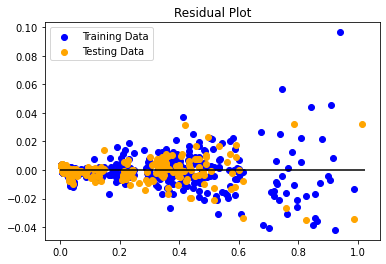

In [68]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [69]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

First 10 Predictions:   [[0.02812535]
 [0.34816551]
 [0.01895257]
 [0.01904565]
 [0.45379988]
 [0.01082482]
 [0.04831993]
 [0.02061139]
 [0.14087256]
 [0.02870643]]
First 10 Actual stats: [[0.02929225]
 [0.35156254]
 [0.01872038]
 [0.01935186]
 [0.44579524]
 [0.01117124]
 [0.05083898]
 [0.02120851]
 [0.14178487]
 [0.03069399]]


# Finalize the DataFrame with stocks indexes, Unemployment and USDI


In [70]:
dow_file=pd.read_csv('Resources/DOW.csv')
nasdaq_file=pd.read_csv('Resources/NASDAQ.csv')
sp500_file=pd.read_csv('Resources/SP500.csv')


In [71]:
dow_df=pd.DataFrame(dow_file)
nasdaq_df=pd.DataFrame(nasdaq_file)
sp500_df=pd.DataFrame(sp500_file)

In [72]:
dow_df['DOW_Average']=(dow_df['Open']+dow_df['High']+dow_df['Low']+dow_df['Close'])/4
nasdaq_df['NASDAQ_Average']=(nasdaq_df['Open']+nasdaq_df['High']+nasdaq_df['Low']+nasdaq_df['Close'])/4
sp500_df['SP500_Average']=(sp500_df['Open']+sp500_df['High']+sp500_df['Low']+sp500_df['Close'])/4


In [73]:
dow_df=dow_df.rename(columns={'Adj Close':'Adjusted_Close'})
nasdaq_df=nasdaq_df.rename(columns={'Adj Close':'Adjusted_Close'})
sp500_df=sp500_df.rename(columns={'Adj Close':'Adjusted_Close'})

In [74]:
dow_df=dow_df[['Date','Adjusted_Close']]
nasdaq_df=nasdaq_df[['Date','Adjusted_Close']]
sp500_df=sp500_df[['Date','Adjusted_Close']]

In [75]:
dow_df['Date']=pd.to_datetime(dow_df['Date'])

In [76]:
nasdaq_df['Date']=pd.to_datetime(nasdaq_df['Date'])
sp500_df['Date']=pd.to_datetime(sp500_df['Date'])

In [77]:
final_btc_df['Date']=final_btc_df['Date'].astype('datetime64[ns]')

In [78]:
final_btc_df=final_btc_df.merge(dow_df,on='Date',how='left')

In [79]:
final_btc_df=final_btc_df.merge(nasdaq_df,on='Date',how='left')

In [80]:
final_btc_df=final_btc_df.merge(sp500_df,on='Date',how='left')

In [81]:
final_btc_df=final_btc_df.rename(columns={'Adjusted_Close_x':'DOW_Close','Adjusted_Close_y':'NASDAQ_Close','Adjusted_Close':'SP500_Close'})

In [82]:
final_btc_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year,Unemployment_Percentage,USDI,Y_Average,DOW_Close,NASDAQ_Close,SP500_Close
0,2013-04-28,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,3.88,2013-04,7.6,82.47,134.3975,NaN,NaN,NaN
1,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,13.49,2013-04,7.6,82.15,140.1175,NaN,NaN,NaN
2,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,12.88,2013-04,7.6,81.75,140.9950,NaN,NaN,NaN
3,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,32.17,2013-05,7.5,81.48,125.9000,NaN,NaN,NaN
4,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,33.32,2013-05,7.5,82.22,109.8675,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,535.81,2018-11,3.7,96.92,3899.1700,NaN,NaN,NaN
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,463.22,2018-11,3.7,97.07,3886.3150,24640.24023,7081.850098,2673.449951
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,201.95,2018-11,3.7,97.37,3777.6600,24748.73047,7082.700195,2682.169922
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,563.43,2018-11,3.7,96.79,4072.0650,25366.42969,7291.589844,2743.790039


In [83]:
all_data_df=final_btc_df[~pd.isnull(final_btc_df['DOW_Close'])]

In [84]:
all_data_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year,Unemployment_Percentage,USDI,Y_Average,DOW_Close,NASDAQ_Close,SP500_Close
176,2013-10-21,174.80,184.82,174.80,182.21,0.000000e+00,2.164518e+09,10.02,2013-10,7.2,79.69,179.1575,15392.20020,3920.050049,1744.660034
177,2013-10-22,182.65,196.27,182.65,193.76,0.000000e+00,2.302910e+09,13.62,2013-10,7.2,79.23,188.8325,15467.66016,3929.570068,1754.670044
178,2013-10-23,193.36,213.62,192.38,213.62,0.000000e+00,2.540139e+09,21.24,2013-10,7.2,79.26,203.2450,15413.33008,3907.070068,1746.380005
179,2013-10-24,214.30,217.42,168.52,198.23,0.000000e+00,2.358199e+09,48.90,2013-10,7.2,79.19,199.6175,15509.20996,3928.959961,1752.069946
180,2013-10-25,197.69,198.87,168.50,186.69,0.000000e+00,2.222012e+09,30.37,2013-10,7.2,79.19,187.9375,15570.28027,3943.360107,1759.770020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2018-11-23,4360.70,4396.42,4195.68,4347.11,4.871490e+09,7.559885e+10,200.74,2018-11,3.7,96.92,4324.9775,24285.94922,6938.979980,2632.560059
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,463.22,2018-11,3.7,97.07,3886.3150,24640.24023,7081.850098,2673.449951
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,201.95,2018-11,3.7,97.37,3777.6600,24748.73047,7082.700195,2682.169922
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,563.43,2018-11,3.7,96.79,4072.0650,25366.42969,7291.589844,2743.790039


In [85]:
X=all_data_df[['Volume','Market_Cap','Spread','Unemployment_Percentage','USDI','DOW_Close','NASDAQ_Close','SP500_Close']]
y=all_data_df['Y_Average'].values.reshape(-1,1)

In [86]:
print(X.shape,y.shape)

(1288, 8) (1288, 1)


In [87]:
model=LinearRegression()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.6, random_state=25)


In [89]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [90]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [91]:
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [92]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-0.03688932  0.97101837  0.03008723  0.0028841  -0.00369588  0.00940496
  -0.01310635 -0.00221547]]
y-axis intercept:  [0.0029703]


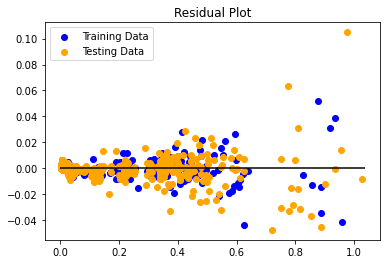

In [93]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [94]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

First 10 Predictions:   [[0.22721585]
 [0.0049864 ]
 [0.02475372]
 [0.02097315]
 [0.01356821]
 [0.34000807]
 [0.36215001]
 [0.01517648]
 [0.60984834]
 [0.00855379]]
First 10 Actual stats: [[0.22280272]
 [0.00481376]
 [0.02465548]
 [0.02089419]
 [0.0124331 ]
 [0.33479101]
 [0.35400073]
 [0.0107529 ]
 [0.60111495]
 [0.00907187]]


In [95]:
y_new = y_scaler.inverse_transform(y_test_scaled)
y_new1 = y_scaler.inverse_transform(predictions)


In [96]:
len(y_new)

773

In [97]:
y_new1

array([[ 4318.21238003],
       [  286.81666074],
       [  645.40963877],
       [  576.82748189],
       [  442.49678043],
       [ 6364.34099004],
       [ 6766.01102217],
       [  471.67188589],
       [11259.42968978],
       [  351.53166758],
       [  722.30861855],
       [ 9303.20205898],
       [  479.15336664],
       [ 1171.57936388],
       [ 2763.4647644 ],
       [  426.38850576],
       [  698.8577929 ],
       [  604.31244438],
       [  612.34282246],
       [  494.06920334],
       [  310.9896467 ],
       [ 6713.36981736],
       [ 6483.21101868],
       [  354.73823475],
       [  254.60975918],
       [  262.65945636],
       [  665.02514436],
       [  490.32020591],
       [ 7607.60921122],
       [ 6243.14267142],
       [  584.83330649],
       [  631.93933115],
       [  269.54945293],
       [  519.60921259],
       [  257.04099456],
       [  847.47912523],
       [  272.34019326],
       [  266.30842177],
       [ 1244.98675334],
       [  577.6078418 ],


In [98]:
all_data_df['Stock_Average_Close']=(all_data_df['DOW_Close']+all_data_df['NASDAQ_Close']+all_data_df['SP500_Close'])/3

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
X=all_data_df[['Volume','Market_Cap','Spread','Unemployment_Percentage','USDI','DOW_Close','NASDAQ_Close','SP500_Close']]
y=all_data_df['Y_Average']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.8, random_state=25)


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [102]:
clf = Lasso(max_iter=20000)
parameters={'alpha':[1e-15,1e-10,1e-8]}
lasso_regressor=GridSearchCV(clf,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)
clf.fit(X_train,y_train)

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1457763.219257799, tolerance: 229115.1587244396
  positive)
C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1450371.219198146, tolerance: 217829.87838994744
  positive)
C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1513678.9428031135, tolerance: 234898.34986854263
  positive)
C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge.

Lasso(max_iter=20000)

In [103]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-25189.921887733253


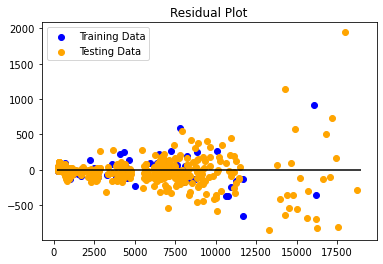

In [104]:
predictions = clf.predict(X_test)
clf.fit(X_train, y_train)
plt.scatter(clf.predict(X_train), clf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(clf.predict(X_test), clf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [105]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test[:10]}")

First 10 Predictions:   [ 4311.47760832   292.53413034   640.87096889   573.64947147
   445.03983213  6337.56933256  6753.63725594   476.57161706
 11220.22512373   356.61035844]
First 10 Actual stats: 1571     4238.1550
911       283.6850
400       643.6275
1195      575.3950
1079      421.9050
1993     6269.7000
1877     6618.1775
348       391.4250
1732    11101.0000
950       360.9300
Name: Y_Average, dtype: float64


In [106]:
from sklearn.feature_selection import VarianceThreshold


In [107]:
X=all_data_df[['Volume','Market_Cap','Spread','Unemployment_Percentage','USDI','DOW_Close','NASDAQ_Close','SP500_Close']]
y=all_data_df['Y_Average']

In [108]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [109]:
sel.fit_transform(X)

array([[0.00000000e+00, 2.16451814e+09, 1.00200000e+01, ...,
        1.53922002e+04, 3.92005005e+03, 1.74466003e+03],
       [0.00000000e+00, 2.30291026e+09, 1.36200000e+01, ...,
        1.54676602e+04, 3.92957007e+03, 1.75467004e+03],
       [0.00000000e+00, 2.54013940e+09, 2.12400000e+01, ...,
        1.54133301e+04, 3.90707007e+03, 1.74638000e+03],
       ...,
       [5.99872000e+09, 6.64689703e+10, 2.01950000e+02, ...,
        2.47487305e+04, 7.08270020e+03, 2.68216992e+03],
       [7.28028000e+09, 7.40725601e+10, 5.63430000e+02, ...,
        2.53664297e+04, 7.29158984e+03, 2.74379004e+03],
       [6.50334777e+09, 7.44510169e+10, 2.67250000e+02, ...,
        2.53388398e+04, 7.27308008e+03, 2.73780005e+03]])

# Drop out the Spread column and Append the Up/Down Column

In [112]:
all_data_df=all_data_df.drop(columns={'Spread'},axis=1)

In [113]:
all_data_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year,Unemployment_Percentage,USDI,Y_Average,DOW_Close,NASDAQ_Close,SP500_Close,Stock_Average_Close
176,2013-10-21,174.80,184.82,174.80,182.21,0.000000e+00,2.164518e+09,2013-10,7.2,79.69,179.1575,15392.20020,3920.050049,1744.660034,7018.970094
177,2013-10-22,182.65,196.27,182.65,193.76,0.000000e+00,2.302910e+09,2013-10,7.2,79.23,188.8325,15467.66016,3929.570068,1754.670044,7050.633424
178,2013-10-23,193.36,213.62,192.38,213.62,0.000000e+00,2.540139e+09,2013-10,7.2,79.26,203.2450,15413.33008,3907.070068,1746.380005,7022.260051
179,2013-10-24,214.30,217.42,168.52,198.23,0.000000e+00,2.358199e+09,2013-10,7.2,79.19,199.6175,15509.20996,3928.959961,1752.069946,7063.413289
180,2013-10-25,197.69,198.87,168.50,186.69,0.000000e+00,2.222012e+09,2013-10,7.2,79.19,187.9375,15570.28027,3943.360107,1759.770020,7091.136799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2018-11-23,4360.70,4396.42,4195.68,4347.11,4.871490e+09,7.559885e+10,2018-11,3.7,96.92,4324.9775,24285.94922,6938.979980,2632.560059,11285.829753
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,2018-11,3.7,97.07,3886.3150,24640.24023,7081.850098,2673.449951,11465.180093
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,2018-11,3.7,97.37,3777.6600,24748.73047,7082.700195,2682.169922,11504.533529
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,2018-11,3.7,96.79,4072.0650,25366.42969,7291.589844,2743.790039,11800.603191


In [114]:
X=all_data_df[['Volume','Market_Cap','Unemployment_Percentage','USDI','Stock_Average_Close']]
y=all_data_df['Y_Average'].values.reshape(-1,1)

In [115]:
model=LinearRegression()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.8, random_state=25)


In [117]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [118]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [119]:
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

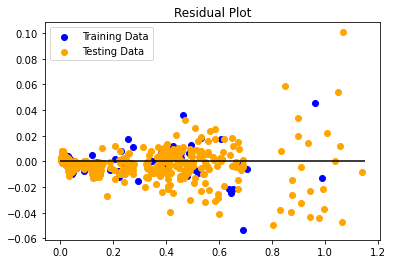

In [120]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [121]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 0.01180304  0.98281891  0.0071151  -0.00352556 -0.0051447 ]]
y-axis intercept:  [0.00073805]


In [122]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

First 10 Predictions:   [[0.24814841]
 [0.00608373]
 [0.02659045]
 [0.02303412]
 [0.01485155]
 [0.37631504]
 [0.40023858]
 [0.01598135]
 [0.6761741 ]
 [0.01006247]]
First 10 Actual stats: [[0.24693536]
 [0.00515645]
 [0.02716357]
 [0.02299179]
 [0.01360731]
 [0.37114537]
 [0.39245151]
 [0.01174375]
 [0.66653425]
 [0.00987926]]


In [123]:
y_actual = y_scaler.inverse_transform(y_test_scaled)
y_predicted = y_scaler.inverse_transform(predictions)

In [124]:
y_actual

array([[4238.155 ],
       [ 283.685 ],
       [ 643.6275],
       ...,
       [ 374.0425],
       [ 585.32  ],
       [ 504.5425]])

In [125]:
y_predicted

array([[4257.995241  ],
       [ 298.85137112],
       [ 634.25361407],
       ...,
       [ 387.33385125],
       [ 588.89051943],
       [ 516.77357653]])

In [135]:
up_down_list=list(all_data_df['Close']-all_data_df['Open'])

up_down_list


[7.409999999999997,
 11.109999999999985,
 20.25999999999999,
 -16.07000000000002,
 -11.0,
 2.3400000000000034,
 5.839999999999975,
 -4.4199999999999875,
 4.1699999999999875,
 2.280000000000001,
 14.439999999999998,
 16.03,
 17.72,
 34.73000000000002,
 40.25999999999999,
 17.029999999999973,
 17.269999999999982,
 46.39999999999998,
 13.789999999999964,
 -1.4600000000000364,
 206.97999999999996,
 -128.14999999999998,
 12.850000000000023,
 128.1099999999999,
 47.370000000000005,
 26.090000000000032,
 122.37,
 78.11000000000001,
 89.96000000000004,
 91.90999999999997,
 31.87999999999988,
 73.59000000000015,
 -107.62000000000012,
 -212.93000000000006,
 99.3900000000001,
 96.18999999999994,
 -110.59000000000003,
 -9.519999999999982,
 17.600000000000023,
 -174.36,
 -24.25,
 -155.5,
 172.9000000000001,
 -68.89999999999998,
 60.35000000000002,
 -6.779999999999973,
 78.03999999999996,
 -28.209999999999923,
 14.779999999999973,
 -6.310000000000059,
 28.949999999999932,
 15.870000000000005,
 17.24

In [136]:
up_down_list = ['Up' if x >0 else 'Down' for x in up_down_list]
up_down_list

['Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',

In [137]:
all_data_df['Movement']=up_down_list

In [138]:
all_data_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year,Unemployment_Percentage,USDI,Y_Average,DOW_Close,NASDAQ_Close,SP500_Close,Stock_Average_Close,Movement
176,2013-10-21,174.80,184.82,174.80,182.21,0.000000e+00,2.164518e+09,2013-10,7.2,79.69,179.1575,15392.20020,3920.050049,1744.660034,7018.970094,Up
177,2013-10-22,182.65,196.27,182.65,193.76,0.000000e+00,2.302910e+09,2013-10,7.2,79.23,188.8325,15467.66016,3929.570068,1754.670044,7050.633424,Up
178,2013-10-23,193.36,213.62,192.38,213.62,0.000000e+00,2.540139e+09,2013-10,7.2,79.26,203.2450,15413.33008,3907.070068,1746.380005,7022.260051,Up
179,2013-10-24,214.30,217.42,168.52,198.23,0.000000e+00,2.358199e+09,2013-10,7.2,79.19,199.6175,15509.20996,3928.959961,1752.069946,7063.413289,Down
180,2013-10-25,197.69,198.87,168.50,186.69,0.000000e+00,2.222012e+09,2013-10,7.2,79.19,187.9375,15570.28027,3943.360107,1759.770020,7091.136799,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2018-11-23,4360.70,4396.42,4195.68,4347.11,4.871490e+09,7.559885e+10,2018-11,3.7,96.92,4324.9775,24285.94922,6938.979980,2632.560059,11285.829753,Down
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,2018-11,3.7,97.07,3886.3150,24640.24023,7081.850098,2673.449951,11465.180093,Down
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,2018-11,3.7,97.37,3777.6600,24748.73047,7082.700195,2682.169922,11504.533529,Up
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,2018-11,3.7,96.79,4072.0650,25366.42969,7291.589844,2743.790039,11800.603191,Up


In [139]:
label_endoded=pd.get_dummies(all_data_df['Movement'])

In [140]:
label_endoded

,Down,Up
176,0,1
177,0,1
178,0,1
179,1,0
180,1,0
...,...,...
2035,1,0
2038,1,0
2039,0,1
2040,0,1


In [141]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
all_data_df['Label_Encoded']= label_encoder.fit_transform(all_data_df['Movement']) 


In [142]:
all_data_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year,Unemployment_Percentage,USDI,Y_Average,DOW_Close,NASDAQ_Close,SP500_Close,Stock_Average_Close,Movement,Label_Encoded
176,2013-10-21,174.80,184.82,174.80,182.21,0.000000e+00,2.164518e+09,2013-10,7.2,79.69,179.1575,15392.20020,3920.050049,1744.660034,7018.970094,Up,1
177,2013-10-22,182.65,196.27,182.65,193.76,0.000000e+00,2.302910e+09,2013-10,7.2,79.23,188.8325,15467.66016,3929.570068,1754.670044,7050.633424,Up,1
178,2013-10-23,193.36,213.62,192.38,213.62,0.000000e+00,2.540139e+09,2013-10,7.2,79.26,203.2450,15413.33008,3907.070068,1746.380005,7022.260051,Up,1
179,2013-10-24,214.30,217.42,168.52,198.23,0.000000e+00,2.358199e+09,2013-10,7.2,79.19,199.6175,15509.20996,3928.959961,1752.069946,7063.413289,Down,0
180,2013-10-25,197.69,198.87,168.50,186.69,0.000000e+00,2.222012e+09,2013-10,7.2,79.19,187.9375,15570.28027,3943.360107,1759.770020,7091.136799,Down,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2018-11-23,4360.70,4396.42,4195.68,4347.11,4.871490e+09,7.559885e+10,2018-11,3.7,96.92,4324.9775,24285.94922,6938.979980,2632.560059,11285.829753,Down,0
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,2018-11,3.7,97.07,3886.3150,24640.24023,7081.850098,2673.449951,11465.180093,Down,0
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,2018-11,3.7,97.37,3777.6600,24748.73047,7082.700195,2682.169922,11504.533529,Up,1
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,2018-11,3.7,96.79,4072.0650,25366.42969,7291.589844,2743.790039,11800.603191,Up,1


In [198]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
X=all_data_df[['Volume','Market_Cap','Unemployment_Percentage','USDI','Stock_Average_Close','Y_Average']]
y=all_data_df['Label_Encoded']


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [201]:
print(X_train.shape,y_train.shape)

(901, 6) (901,)


In [202]:
model = LogisticRegression(solver='liblinear',C=10, random_state=42)


In [203]:
model.fit(X_train,y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [204]:
print(model.classes_)
print(model.intercept_)
print(model.coef_)


[0 1]
[8.71448403e-20]
[[-1.17655886e-10  5.98956307e-12  3.46789907e-19  9.60746124e-18
   7.00087857e-16 -1.37281697e-16]]


In [205]:
print(model.predict_proba(X_train))


[[0.47430169 0.52569831]
 [0.50202251 0.49797749]
 [0.49619649 0.50380351]
 ...
 [0.4453446  0.5546554 ]
 [0.49106998 0.50893002]
 [0.48789807 0.51210193]]


In [206]:
model.predict(X_train)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [207]:
model.score(X_train, y_train)

0.5305216426193119

In [208]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.60      0.06      0.11       431
           1       0.53      0.96      0.68       470

    accuracy                           0.53       901
   macro avg       0.56      0.51      0.39       901
weighted avg       0.56      0.53      0.41       901



In [240]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)


In [241]:
X=all_data_df[['Volume','Market_Cap','Unemployment_Percentage','USDI','Stock_Average_Close']]
y = all_data_df.loc[:, all_data_df.columns == 'Label_Encoded']


In [242]:
print(y)

      Label_Encoded
176               1
177               1
178               1
179               0
180               0
...             ...
2035              0
2038              0
2039              1
2040              1
2041              1

[1288 rows x 1 columns]


In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label_Encoded'])

In [244]:
data_final_vars=all_data_df.columns.values.tolist()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [246]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.683831
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Label_Encoded   No. Observations:                 1288
Model:                          Logit   Df Residuals:                     1283
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Oct 2020   Pseudo R-squ.:                0.008953
Time:                        12:53:14   Log-Likelihood:                -880.77
converged:                       True   LL-Null:                       -888.73
Covariance Type:            nonrobust   LLR p-value:                  0.003138
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volume                  -1.604e-10   5.68e-11     -2.824      0.005   -2.72e-10   

In [257]:
X=all_data_df[['Volume','Market_Cap','USDI','Stock_Average_Close']]
y = all_data_df.loc[:, all_data_df.columns == 'Label_Encoded']


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [259]:
model = LogisticRegression(solver='liblinear',C=10, random_state=42)
model.fit(X_train,y_train)
model.predict(X_train)
model.score(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.60      0.06      0.11       431
           1       0.53      0.96      0.68       470

    accuracy                           0.53       901
   macro avg       0.56      0.51      0.39       901
weighted avg       0.56      0.53      0.41       901



C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [260]:
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label_Encoded'])

In [261]:
data_final_vars=all_data_df.columns.values.tolist()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [262]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.684854
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Label_Encoded   No. Observations:                 1288
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Oct 2020   Pseudo R-squ.:                0.007469
Time:                        13:03:19   Log-Likelihood:                -882.09
converged:                       True   LL-Null:                       -888.73
Covariance Type:            nonrobust   LLR p-value:                  0.004075
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Volume              -1.722e-10   5.68e-11     -3.034      0.002   -2.83e-10    -6.1e-11
Ma

In [350]:
X=all_data_df[['Volume','Market_Cap','USDI','Stock_Average_Close','Unemployment_Percentage']]
y = all_data_df['Y_Average'].values.reshape(-1,1)


In [351]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True]
[3 2 1 1 1]


C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [352]:
nof_list=np.arange(1,5)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 4
Score with 4 features: 0.998432


C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [353]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Market_Cap', 'USDI', 'Stock_Average_Close', 'Unemployment_Percentage'], dtype='object')


C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [364]:
X=all_data_df[['Market_Cap', 'USDI', 'Stock_Average_Close', 'Unemployment_Percentage']]
y=all_data_df['Y_Average'].values.reshape(-1,1)

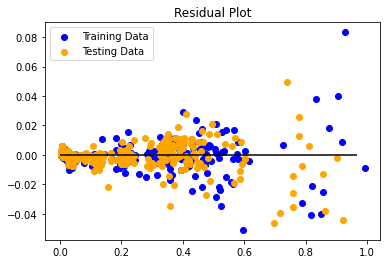

In [365]:
model=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
model.fit(X_train_scaled,y_train_scaled)
predictions = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [366]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

Weight coefficients:  [[ 9.91451846e-01 -5.29526037e-03  3.79283974e-04  4.57715256e-03]]
y-axis intercept:  [0.0019067]
First 10 Predictions:   [[0.34186498]
 [0.00392223]
 [0.00364297]
 [0.01112144]
 [0.02521917]
 [0.00381641]
 [0.04899409]
 [0.01046   ]
 [0.30039253]
 [0.01875834]]
First 10 Actual stats: [[0.33656383]
 [0.00304968]
 [0.00213516]
 [0.01001743]
 [0.02542945]
 [0.00162035]
 [0.05103091]
 [0.01108641]
 [0.30609443]
 [0.0177818 ]]


In [367]:
y_actual = y_scaler.inverse_transform(y_test_scaled)
y_predicted = y_scaler.inverse_transform(predictions)

In [368]:
y_actual

array([[ 6509.155 ],
       [  236.515 ],
       [  219.315 ],
       [  367.5625],
       [  657.4275],
       [  209.6325],
       [ 1138.9325],
       [  387.6675],
       [ 5936.095 ],
       [  513.5925],
       [  620.8925],
       [ 6504.7775],
       [  225.785 ],
       [ 7584.7225],
       [  292.87  ],
       [  239.175 ],
       [ 1021.0075],
       [ 6885.185 ],
       [  270.7925],
       [  228.775 ],
       [  374.0425],
       [  839.2075],
       [ 9160.05  ],
       [  360.93  ],
       [  196.36  ],
       [  442.93  ],
       [  610.945 ],
       [  259.31  ],
       [  237.285 ],
       [  587.52  ],
       [ 1113.7575],
       [14303.825 ],
       [  276.2325],
       [  372.9325],
       [ 9301.5525],
       [ 1060.4625],
       [  687.2525],
       [ 6494.9975],
       [11456.45  ],
       [ 8564.37  ],
       [  230.4125],
       [  592.5325],
       [  953.0425],
       [ 6356.7975],
       [ 3526.195 ],
       [ 6456.025 ],
       [  618.3325],
       [  649

In [369]:
y_predicted

array([[ 6608.85745637],
       [  252.92572917],
       [  247.67352912],
       [  388.32637624],
       [  653.47255542],
       [  250.93553144],
       [ 1100.62445398],
       [  375.88620733],
       [ 5828.85530359],
       [  531.95908812],
       [  638.9335188 ],
       [ 6674.31000617],
       [  247.30921022],
       [ 7745.03548011],
       [  303.34672512],
       [  263.8880366 ],
       [ 1002.63129717],
       [ 6513.24911976],
       [  287.45009283],
       [  248.20697058],
       [  369.7483441 ],
       [  759.95312966],
       [ 9009.67541024],
       [  360.27449804],
       [  312.34253171],
       [  481.09732906],
       [  618.3800681 ],
       [  284.89690113],
       [  260.94946042],
       [  595.98171753],
       [  971.12459599],
       [14791.04474849],
       [  284.88766793],
       [  391.0304405 ],
       [ 9256.29895873],
       [ 1032.89677383],
       [  693.04282113],
       [ 6621.73250571],
       [11345.1943161 ],
       [ 8867.25552159],


In [370]:
test_df=all_data_df

In [371]:
test_df=test_df.set_index('Y_Average')

In [372]:
print(y_actual[1])

[236.515]


In [373]:
test_df.loc[236.515]

Date                       2015-09-30 00:00:00
Open                                    236.64
High                                    237.73
Low                                     235.63
Close                                   236.06
Volume                             1.97435e+07
Market_Cap                         3.46363e+09
Month_Year                             2015-09
Unemployment_Percentage                      5
USDI                                     96.35
DOW_Close                              16284.7
NASDAQ_Close                           4620.16
SP500_Close                            1920.03
Stock_Average_Close                     7608.3
Movement                                  Down
Label_Encoded                                0
Name: 236.515, dtype: object